# Spherical Gaussian experiment: generative results

## Setup

In [4]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
import logging
import corner
from mpl_toolkits.mplot3d import Axes3D

sys.path.append("../../")

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Load results

In [12]:
algo_filenames = [
    "flow",
    "pie",
    "mf",
    "gamf",
    "mf_specified",
    "pie_specified",
    "gamf_specified",
]
algo_additionals = [
    "",
    "",
    "",
    "", 
    "",
    "", 
    "",
]
algo_labels = [
    "Flow",
    "PIE",
    "MF",
    "MF-G",
    "PIE-S",
    "MF-S",
    "MF-GS",
]
algo_colors = ["C{}".format(i) for i in range(10)]
algo_markers = ["o", "s", "^", "P", "x", "<", ">"]

setup_filenames = [
    "2_3_0.010",
    "2_3_0.001",
    "2_3_0.100",
]
setup_labels = [
    r"$\epsilon = 0.01$",
    r"$\epsilon = 0.001$",
    r"$\epsilon = 0.1$",
]


In [14]:
def load(name, shape, numpyfy=True, result_dir="../data/results"):
    all_results = []
    
    print("")
    
    for algo_filename in algo_filenames:
        results = []
        
        for setup_filename in setup_filenames:
            try:
                results.append(np.load(
                    "{}/{}_2_spherical_gaussian_{}_{}.npy".format(
                        result_dir, algo_filename, setup_filename, name
                    )
                ))
            except FileNotFoundError as e:
                #print(e)
                
                if shape is None:
                    results.append(None)
                else:
                    results.append(np.nan*np.ones(shape))
                    
            
            print(algo_filename, "None" if results[-1] is None else results[-1].shape)
            
        all_results.append(results)
    
    return np.asarray(all_results) if numpyfy else all_results

x_gen = load("samples", None, numpyfy=False)
logp_gen = load("samples_likelihood", (1000,))
distance_gen = load("samples_manifold_distance", (1000,))

true_test_log_likelihood = load("true_log_likelihood_test", (1000,))
model_test_log_likelihood = load("model_log_likelihood_test", (1000,100,))
model_test_reco_error = load("model_reco_error_test", (1000,))



flow (10000, 3)
flow (10000, 3)
flow (10000, 3)
pie (10000, 3)
pie (10000, 3)
pie (10000, 3)
mf None
mf None
mf None
gamf (10000, 3)
gamf (10000, 3)
gamf (10000, 3)
mf_specified (10000, 3)
mf_specified (10000, 3)
mf_specified (10000, 3)
pie_specified (10000, 3)
pie_specified (10000, 3)
pie_specified (10000, 3)
gamf_specified (10000, 3)
gamf_specified (10000, 3)
gamf_specified (10000, 3)

flow (10000,)
flow (10000,)
flow (10000,)
pie (10000,)
pie (10000,)
pie (10000,)
mf (1000,)
mf (1000,)
mf (1000,)
gamf (10000,)
gamf (10000,)
gamf (10000,)
mf_specified (10000,)
mf_specified (10000,)
mf_specified (10000,)
pie_specified (10000,)
pie_specified (10000,)
pie_specified (10000,)
gamf_specified (10000,)
gamf_specified (10000,)
gamf_specified (10000,)

flow (10000,)
flow (10000,)
flow (10000,)
pie (10000,)
pie (10000,)
pie (10000,)
mf (1000,)
mf (1000,)
mf (1000,)
gamf (10000,)
gamf (10000,)
gamf (10000,)
mf_specified (10000,)
mf_specified (10000,)
mf_specified (10000,)
pie_specified (10000,)

ValueError: could not broadcast input array from shape (1000,100) into shape (1000)

In [7]:
x_test = np.asarray([
    np.load("../data/samples/spherical_gaussian/spherical_gaussian_{}_x_test.npy".format(setup_filename))
    for setup_filename in setup_filenames
])

true_distances = np.abs(np.sum(x_test**2, axis=-1)**0.5 - 1.)

In [5]:
min_logp = -100.
max_distance = 10.

mean_logp_gen = np.mean(np.clip(logp_gen, min_logp, None), axis=2)
mean_distance_gen = np.mean(np.clip(distance_gen, None, max_distance), axis=2)

mean_logp_truth = np.mean(np.clip(true_test_log_likelihood[0], min_logp, None), axis=1)
mean_distance_truth = np.mean(np.clip(true_distances, None, max_distance), axis=1)

## Plot generated samples

In [6]:
def show_corner(algo=None, show=0, boundary=1.5):
    if algo is None:
        print("Simulator")
        x = np.load("../data/samples/spherical_gaussian/spherical_gaussian_2_3_0.010_x_test.npy")
        _ = corner.corner(x, range=[(-boundary, boundary) for _ in range(3)], bins=10)
        
    else:
        print(algo_labels[algo])
        _ = corner.corner(x_gen[algo][show], range=[(-boundary, boundary) for _ in range(3)], bins=10)

In [7]:
def show_scatter(algo=None, show=0, boundary=1.5):
    if algo is None:
        print("Simulator")
        x = np.load("../data/samples/spherical_gaussian/spherical_gaussian_2_3_0.010_x_train.npy")[:1000]
    else:
        print(algo_labels[algo])
        x = x_gen[algo][show][:1000]
        
    fig = plt.figure(figsize=(5,5))
    ax = Axes3D(fig)
    ax.scatter(x[:,0], x[:,1], x[:,2])
    
    ax.set_xlim(-boundary, boundary)
    ax.set_ylim(-boundary, boundary)
    ax.set_zlim(-boundary, boundary)
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    ax.set_zlabel("$x_2$")
    
    plt.show()
    

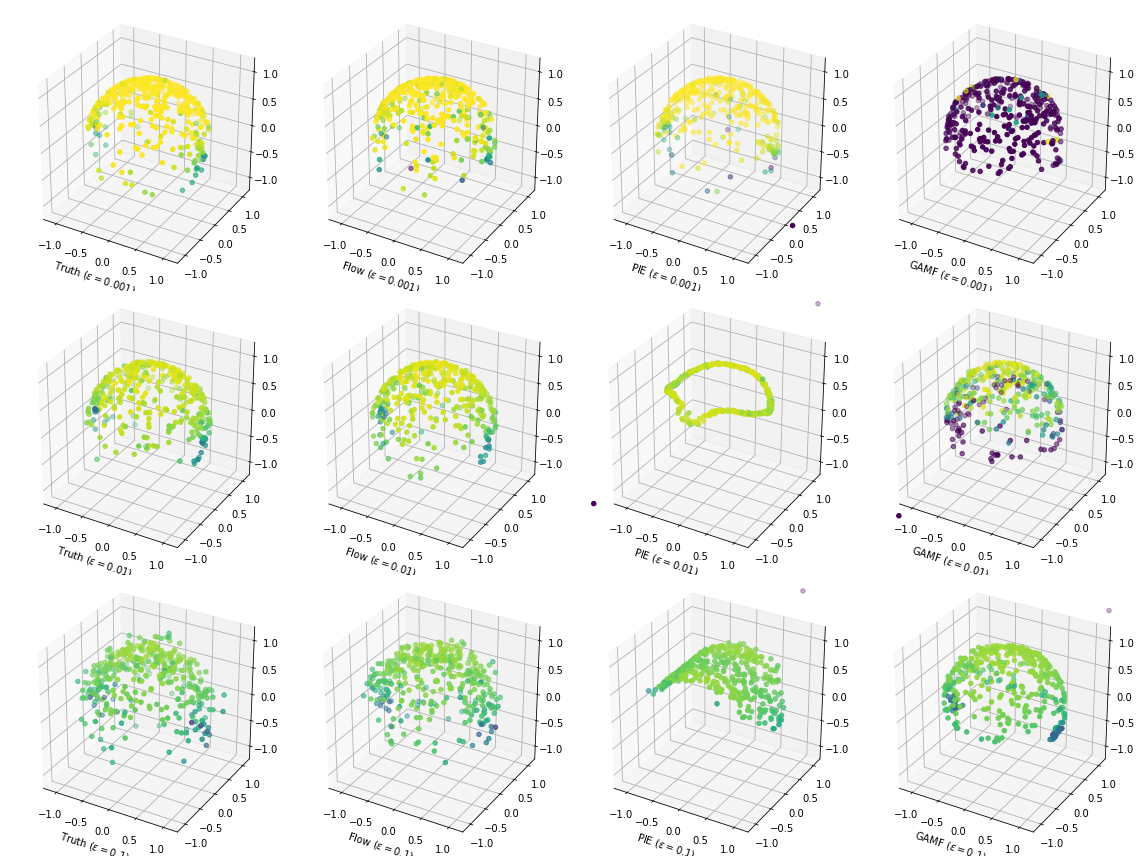

In [8]:
cmin, cmax = -15., 5.
boundary = 1.2
show = [1,0,2]

ncols = len(algo_labels) + 1
nrows = len(show)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for col, algo in enumerate(range(-1, len(algo_labels))):
    for row, setup in enumerate(show):
        if algo < 0:
            x = x_test[setup, :400]
        else:
             x = x_gen[algo][setup][:400]
                
        logp = np.clip(
            true_test_log_likelihood[0, setup, :400] if algo < 0 else logp_gen[algo, setup,:400],
            cmin, cmax
        )
        
        ax = fig.add_subplot(nrows, ncols, row * ncols + col + 1, projection="3d")
        ax.scatter(x[:,0], x[:,1], x[:,2], c=logp, cmap="viridis", vmin=cmin, vmax=cmax)

        ax.set_xlim(-boundary, boundary)
        ax.set_ylim(-boundary, boundary)
        ax.set_zlim(-boundary, boundary)
        ax.set_xlabel(("Truth" if algo < 0 else algo_labels[algo]) + " ({})".format(setup_labels[setup]))
        ax.set_ylabel("")
        ax.set_zlabel("")

plt.tight_layout()
plt.savefig("../figures/generated_samples_3d_spherical_gaussian.pdf")



## Plot eval likelihood on test samples

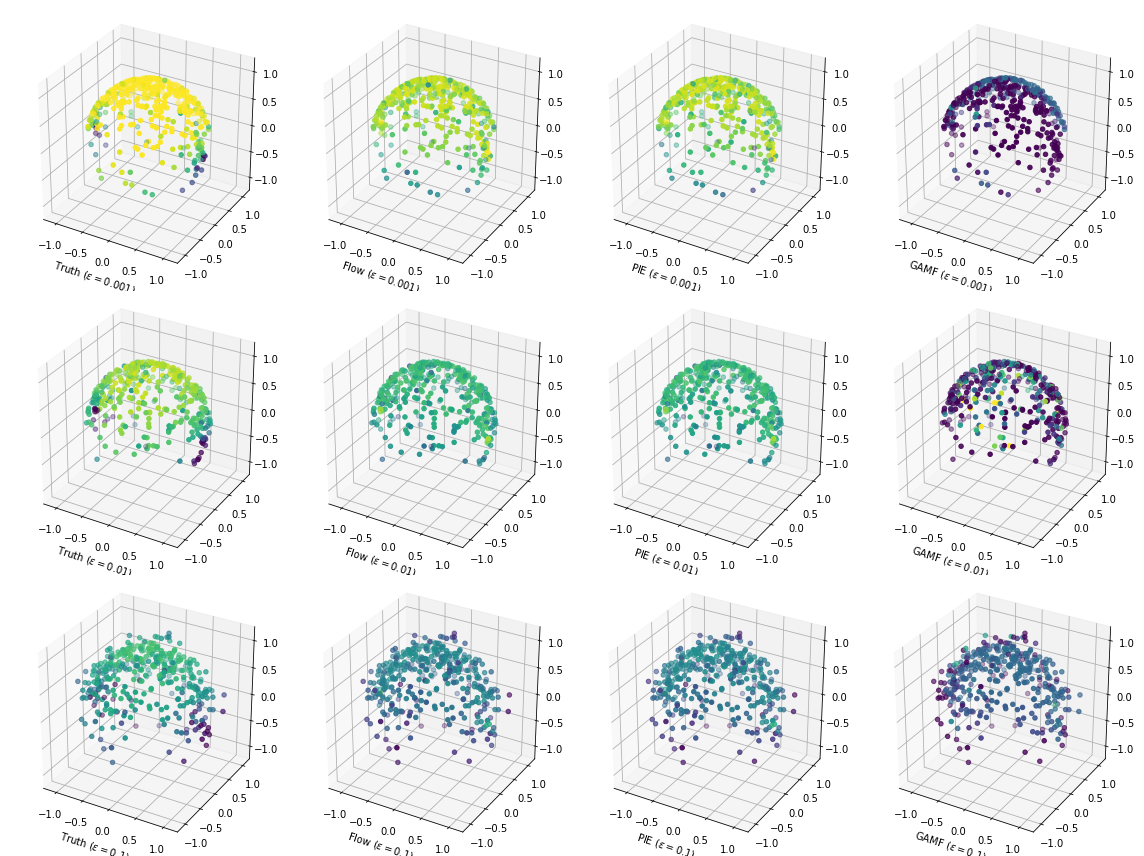

In [9]:
cmin, cmax = -5., 5.
boundary = 1.2
show = [1,0,2]

ncols = len(algo_labels) + 1
nrows = len(show)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for col, algo in enumerate(range(-1, len(algo_labels))):
    for row, setup in enumerate(show):
        x = x_test[setup, :400]
        logp = np.clip(
            true_test_log_likelihood[0, setup, :400] if algo < 0 else model_test_log_likelihood[algo, setup,:400],
            cmin, cmax
        )
        
        ax = fig.add_subplot(nrows, ncols, row * ncols + col + 1, projection="3d")
        ax.scatter(x[:,0], x[:,1], x[:,2], c=logp, vmin=cmin, vmax=cmax, cmap="viridis")

        ax.set_xlim(-boundary, boundary)
        ax.set_ylim(-boundary, boundary)
        ax.set_zlim(-boundary, boundary)
        ax.set_xlabel(("Truth" if algo < 0 else algo_labels[algo]) + " ({})".format(setup_labels[setup]))
        ax.set_ylabel("")
        ax.set_zlabel("")

plt.tight_layout()
plt.savefig("../figures/test_likelihood_3d_spherical_gaussian.pdf")


## Evaluation metrics

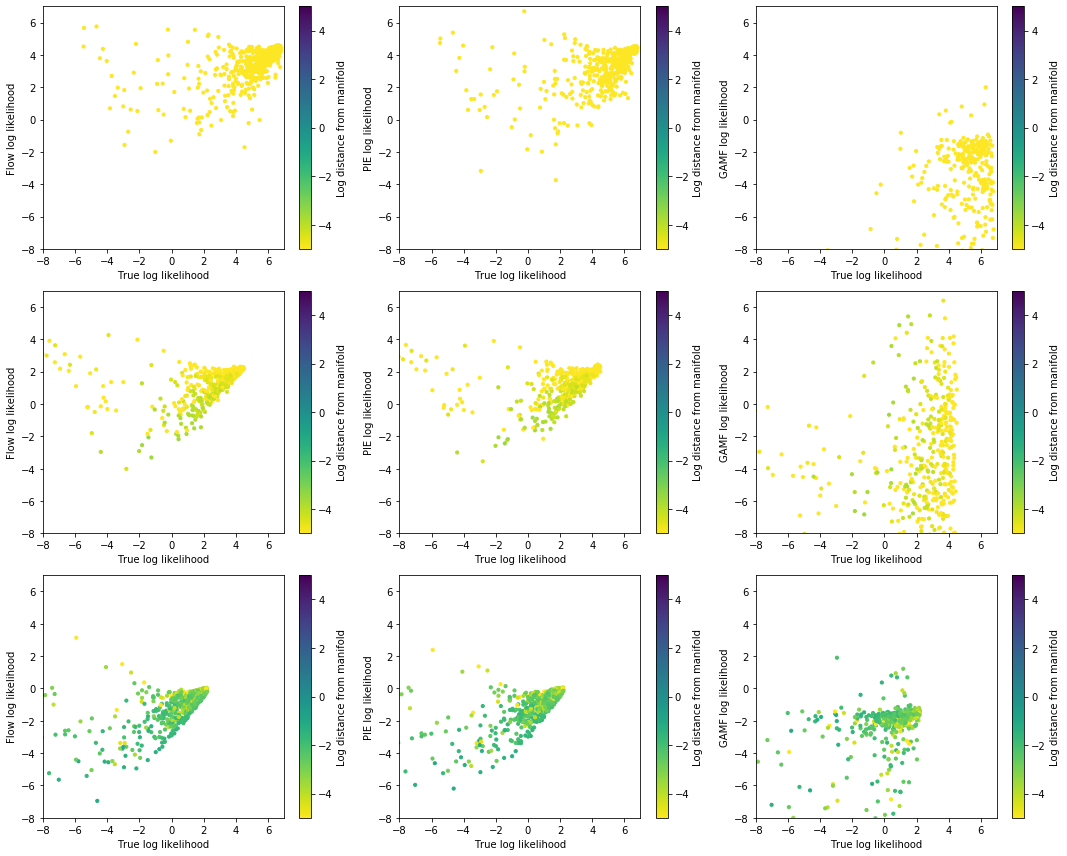

In [10]:
show = [1,0,2]

ncols = len(algo_labels)
nrows = len(show)

fig = plt.figure(figsize=(ncols*5, nrows*4))

for row, setting in enumerate(show):
    for col, algo_label in enumerate(algo_labels):
        ax = plt.subplot(nrows, ncols, row*ncols + col + 1)
        
        sc = plt.scatter(
            true_test_log_likelihood[col, setting,:500],
            model_test_log_likelihood[col, setting,:500],
            c=np.log(np.clip(true_distances[setting,:500], np.exp(-10.), np.exp(10.))),
            s=10.,
            label=algo_label,
            cmap="viridis_r",
            vmin=-5, vmax=5
        )
        cbar = plt.colorbar(sc)
        
        plt.xlabel(r"True log likelihood")
        plt.ylabel(r"{} log likelihood".format(algo_label))
        cbar.set_label('Log distance from manifold')
        
        plt.xlim(-8.,7.)
        plt.ylim(-8.,7.)
    
plt.tight_layout()
plt.savefig("../figures/test_likelihood_scatter_spherical_gaussian.pdf")


## Generative metrics

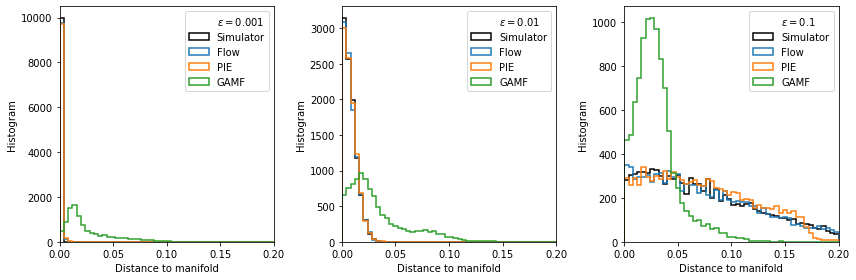

In [11]:
show = [1,0,2]
ncols = 3
nrows = (len(show) - 1) // ncols + 1

xmin, xmax = 0.,0.2

fig = plt.figure(figsize=(ncols*4, nrows*4))

for panel, setting in enumerate(show):
    ax = plt.subplot(nrows, ncols, panel + 1)
    
    plt.plot([], [], lw=0., ls=" ", label=setup_labels[setting])
    
    plt.hist(
        true_distances[setting,:],
        range=(xmin, xmax), bins=50,
        label="Simulator",
        histtype="step",
        lw=1.5,
        color="black"
    )
    
    for algo, (algo_label, c, m) in enumerate(zip(algo_labels, algo_colors, algo_markers)):
        plt.hist(
            distance_gen[algo, setting,:],
            range=(xmin, xmax), bins=50,
            label=algo_label,
            histtype="step",
            lw=1.5,
            color=c
        )
        
    plt.legend()

    plt.xlabel(r"Distance to manifold")
    plt.ylabel(r"Histogram")
    plt.xlim(xmin, xmax)
    #plt.ylim(1., None)
    #plt.yscale("log")
    
plt.tight_layout()
plt.savefig("../figures/generated_samples_distance_distribution_spherical_gaussian.pdf")


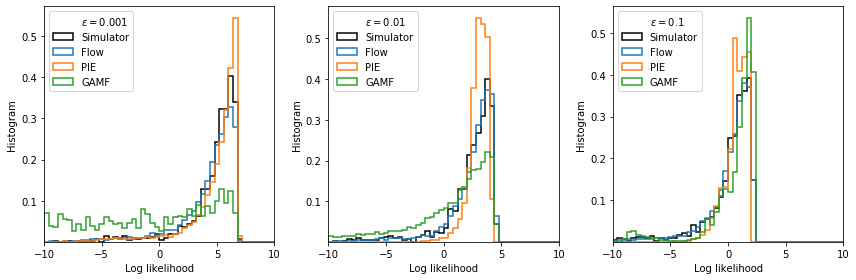

In [12]:
show = [1,0,2]
ncols = 3
nrows = (len(show) - 1) // ncols + 1

xmin, xmax = -10.,10.

fig = plt.figure(figsize=(ncols*4, nrows*4))

for panel, setting in enumerate(show):
    ax = plt.subplot(nrows, ncols, panel + 1)
    
    plt.plot([], [], lw=0., ls=" ", label=setup_labels[setting])
    
    for algo, (algo_label, c, m) in enumerate(zip(algo_labels, algo_colors, algo_markers)):
        if algo == 0:
            plt.hist(
                true_test_log_likelihood[algo, setting,:],
                range=(xmin, xmax), bins=50,
                label="Simulator",
                histtype="step",
                lw=1.5,
                color="black",
                density=True
            )
        plt.hist(
            logp_gen[algo, setting,:],
            range=(xmin, xmax), bins=50,
            label=algo_label,
            histtype="step",
            lw=1.5,
            color=c,
                density=True
        )
        
    plt.legend(loc="upper left")

    plt.xlabel(r"Log likelihood")
    plt.ylabel(r"Histogram")
    plt.xlim(xmin, xmax)
    plt.ylim(1.e-3, None)
    
plt.tight_layout()
plt.savefig("../figures/generated_samples_likelihood_distribution_spherical_gaussian.pdf")



15:28 matplotlib.legend              WARNING No handles with labels found to put in legend.


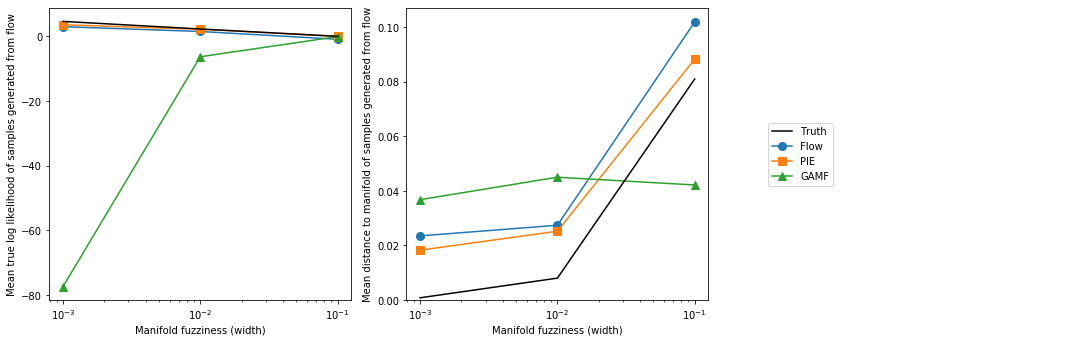

In [13]:
show = [1,0,2]
xs = [0.001, 0.01, 0.1]

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,3,1)
for mean_logp_gen_, algo_label, c, algo_marker in zip(mean_logp_gen, algo_labels, algo_colors, algo_markers):
    plt.plot(xs, mean_logp_gen_[show], label=algo_label, ls="-", marker=algo_marker, ms=8., c=c)
plt.plot(xs, mean_logp_truth[show], label="Truth", ls="-", marker=" ", ms=8., c="black")
plt.xscale("log")
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("Mean true log likelihood of samples generated from flow")

ax = plt.subplot(1,3,2)
for mean_distance_gen_, algo_label, c, algo_marker in zip(mean_distance_gen, algo_labels, algo_colors, algo_markers):
    plt.plot(xs, mean_distance_gen_[show], label=algo_label, ls="-", marker=algo_marker, ms=8, c=c)
plt.plot(xs, mean_distance_truth[show], label="Truth", ls="-", marker=" ", ms=8., c="black")
plt.xscale("log")
plt.ylim(0., None)
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("Mean distance to manifold of samples generated from flow")

ax = plt.subplot(1,3,3)
plt.legend()
plt.plot([], [], label="Truth", ls="-", marker=" ", ms=8., c="black")
for mean_logp_gen_, algo_label, c, algo_marker in zip(mean_logp_gen, algo_labels, algo_colors, algo_markers):
    plt.plot([], [], label=algo_label, ls="-", marker=algo_marker, ms=8., c=c)
plt.legend(loc="center left")
plt.axis("off")

plt.tight_layout()
plt.savefig("../figures/generated_samples_metrics_spherical_gaussian.pdf")
